In [87]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [111]:
plt.rcParams['figure.figsize'] = (26,6)
plt.rcParams["font.family"] = 'DejaVu Serif'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

In [112]:
groupsizedf = pd.read_csv('lsac_plotdata.csv')
groupsizedf

,metric,algorithm,value,Constraints,percentage,version,pct,diff,dataset
0,Accuracy,LR,0.830320,No constraints,0.1,0,0.000000,0.000000,Law School
1,Accuracy,RF,0.871940,No constraints,0.1,0,4.773218,0.041620,Law School
2,Accuracy,SREW,0.830697,True protected attributes,0.1,0,0.045341,0.000377,Law School
3,Accuracy,ADDEB,0.829567,True protected attributes,0.1,0,-0.090806,-0.000753,Law School
4,Accuracy,LFR,0.193032,True protected attributes,0.1,0,-330.146341,-0.637288,Law School
...,...,...,...,...,...,...,...,...,...
2515,Equal Odds Difference,SOFT,0.000000,Noisy protected attributes,0.9,9,-inf,-0.017892,Law School
2516,Equal Odds Difference,PRIV,0.008685,Noisy protected attributes,0.9,9,-106.022450,-0.009208,Law School
2517,Equal Odds Difference,MDRO,0.000000,Noisy protected attributes,0.9,9,-inf,-0.017892,Law School
2518,Equal Odds Difference,ARL,0.025125,No protected attributes,0.9,9,28.785369,0.007232,Law School


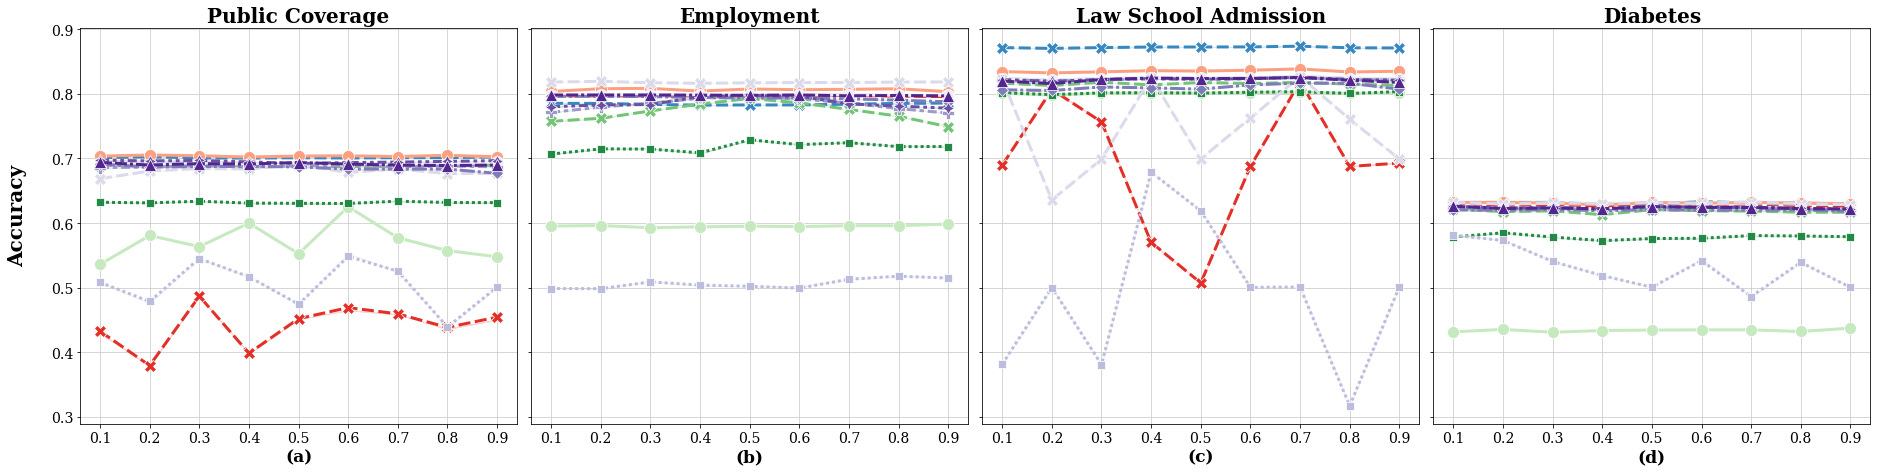

In [143]:
fig, axs = plt.subplots(1,4, sharey= True, figsize=(26, 6.1))

items  = ['publiccov', 'employment', 'lsac', 'diabetes']
titles = ['Public Coverage', 'Employment', 'Law School Admission', 'Diabetes']
subs = ['(a)','(b)','(c)','(d)']
i = 0

for ax,item,title in zip(axs.flatten(),items,titles):

    pals = ['Blues','Reds','Greens','Purples']
    groupsizedf = pd.read_csv(item+'_plotdata.csv')
    algs = set(groupsizedf['algorithm'])
    cons = list(set(groupsizedf['Constraints']))
    cons.sort()
    mdf = groupsizedf[groupsizedf['metric']=='Accuracy']
    group = 'Accuracy'
    for con,pal in zip(cons,pals):
        df_group = mdf[mdf['Constraints']==con]
        df_group = df_group.reset_index(drop=True)
        mnv = min(mdf['value'])
        mxv = max(mdf['value'])

        ax1 = sns.lineplot(ax = ax, data=df_group, x="percentage", y="value", ci = 0, markersize = 12, palette = pal,
                          linewidth = 3, markers = True, style="algorithm", hue="algorithm") #dashes=style

        ax1.xaxis.grid(True,which='both')
        ax1.yaxis.grid(True,which='both')

#         ax1.set_ylim(mnv, mxv)


        ax1.set_facecolor('white')
        ax1.tick_params(axis='y', which='both',labelsize=14)
        ax1.tick_params(axis='x', which='both',labelsize=14)
        box = ax1.get_position()
        ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                         box.width, box.height * 0.9])
        ax1.get_legend().remove()

        plt.gca().yaxis.set_major_formatter(ScalarFormatter())
        
    ax1.set(ylabel="")
    ax1.set_xlabel(subs[i],fontsize=17,weight='bold')
    ax1.set_title(title, fontsize=20,weight='bold')
    i+=1
        
# fig.supxlabel("% noise in protected attribute",fontsize=24,weight='bold', y=-0.06)
fig.supylabel('Accuracy',fontsize=20,weight='bold', x = -0.001)

fig.tight_layout()
plt.savefig('ACCplots.pdf', pad_inches = 0,bbox_inches = "tight")
plt.show()

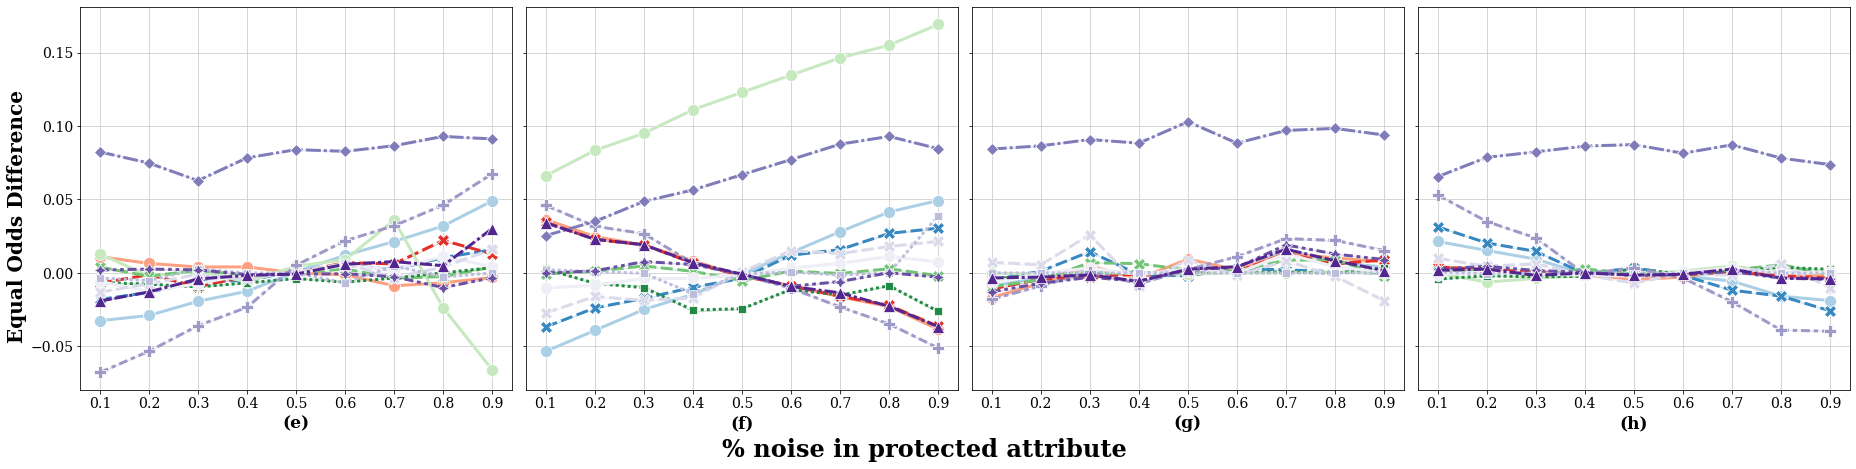

In [156]:
fig, axs = plt.subplots(1,4, sharey = True, figsize=(26, 6.1))

items  = ['publiccov', 'employment', 'lsac', 'diabetes']
titles = ['Public Coverage', 'Employment', 'Law School Admission', 'Diabetes']
subs = ['(e)','(f)','(g)','(h)']
i = 0

for ax,item,title in zip(axs.flatten(),items,titles):

    pals = ['Blues','Reds','Greens','Purples']
    groupsizedf = pd.read_csv(item+'_plotdata.csv')
    algs = set(groupsizedf['algorithm'])
    cons = list(set(groupsizedf['Constraints']))
    cons.sort()
    mdf = groupsizedf[groupsizedf['metric']=='Equal Odds Difference']
    group = 'Accuracy'
    for con,pal in zip(cons,pals):
        df_group = mdf[mdf['Constraints']==con]
        df_group = df_group.reset_index(drop=True)
        mnv = min(mdf['value'])
        mxv = max(mdf['value'])

        ax1 = sns.lineplot(ax = ax, data=df_group, x="percentage", y="value", ci = 0, markersize = 12, palette = pal,
                          linewidth = 3, markers = True, style="algorithm", hue="algorithm") #dashes=style

        ax1.xaxis.grid(True,which='both')
        ax1.yaxis.grid(True,which='both')

#         ax1.set_ylim(mnv, mxv)


        ax1.set_facecolor('white')
        ax1.tick_params(axis='y', which='both',labelsize=14)
        ax1.tick_params(axis='x', which='both',labelsize=14)
        box = ax1.get_position()
        ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                         box.width, box.height * 0.9])
        ax1.get_legend().remove()

        plt.gca().yaxis.set_major_formatter(ScalarFormatter())
        
    ax1.set(ylabel="")
    ax1.set_xlabel(subs[i],fontsize=17,weight='bold')
#     ax1.set_title(title, fontsize=20,weight='bold')
    i+=1
        
fig.supxlabel("% noise in protected attribute",fontsize=24,weight='bold', y=-0.06)
fig.supylabel('Equal Odds Difference',fontsize=20,weight='bold', x=0.01)

fig.tight_layout()
plt.savefig('EODplots.pdf', pad_inches = 0,bbox_inches = "tight")
plt.show()

## Rank Plots